### import package

In [98]:
# pip install lightgbm pandas scikit-learn
# pip install --upgrade lightgbm

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from lightgbm import early_stopping, log_evaluation

### Load data

In [173]:
df = pd.read_csv('D:/Deep_Learning/Keras/PPNCKH/Data/Train_clean.csv')
df_xtest = pd.read_csv('D:/Deep_Learning/Keras/PPNCKH/Data/test_dataset.csv')
df_ytest = pd.read_csv('D:/Deep_Learning/Keras/PPNCKH/Data/sample_submission.csv')

In [174]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205255 entries, 0 to 205254
Data columns (total 21 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   age                                  205255 non-null  int64  
 1   Gender                               205255 non-null  object 
 2   Date_Registered                      205255 non-null  object 
 3   Is_current_loyalty_program_member    205255 non-null  object 
 4   loyalty_points_redeemed              205255 non-null  int64  
 5   loyalty_tier                         205255 non-null  float64
 6   Received_tier_discount_percentage    205255 non-null  float64
 7   Received_card_discount_percentage    205255 non-null  float64
 8   Received_coupon_discount_percentage  205255 non-null  int64  
 9   product_category                     205255 non-null  object 
 10  Product_value                        205255 non-null  int64  
 11  payment_metho

- Setup Target Columns

In [177]:
taget = ['customer_experience']
drop_colunms = ['Date_Registered',  'Received_tier_discount_percentage',
                'Received_card_discount_percentage', 'Received_coupon_discount_percentage',
                'purchased_datetime', 'payment_datetime',
                'released_date', 'estimated_delivery_date','received_date', 'age',
                'loyalty_points_redeemed','Age-Group','loyalty_tier','Product_value','final_payment','product_category'
                ]
drop_colunms_test = ['Date_Registered',  'Received_tier_discount_percentage',
                    'Received_card_discount_percentage', 'Received_coupon_discount_percentage',
                    'purchased_datetime', 'payment_datetime',
                    'released_date', 'estimated_delivery_date','received_date', 
                    'loyalty_points_redeemed', 'user_id', 'transaction_id', 'order_id','tracking_number','id','Product_value',
                    'final_payment',
                    'loyalty_tier','product_category', 'age'
]
X_train = df.drop(columns=taget)
X_train = X_train.drop(columns=drop_colunms)
y_train = df[taget]


In [178]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205255 entries, 0 to 205254
Data columns (total 5 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Gender                             205255 non-null  object
 1   Is_current_loyalty_program_member  205255 non-null  object
 2   payment_method                     205255 non-null  object
 3   purchase_medium                    205255 non-null  object
 4   shipping_method                    205255 non-null  object
dtypes: object(5)
memory usage: 7.8+ MB


- Chia tập test từ tập dữ liệu bên ngoài

In [179]:
X_testing = df_xtest.drop(columns=drop_colunms_test)
y_testing = df_ytest[taget]

- Chia Xtrain, Ytrain

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [159]:
categorical_cols_train = X_train.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    X_train[col] = X_train[col].astype('category')


In [183]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test,  reference=lgb_train)

- Chỉnh ở đây thôi

In [187]:
params = {
    'objective': 'multiclass',         # Phân loại nhiều lớp
    'num_class': 3,                    # Số lượng lớp phân loại (ở đây là 3)
    'boosting_type': 'gbdt',           # Gradient Boosting Decision Tree (mặc định, nhanh và mạnh)
    'metric': 'multi_logloss',         # Hàm đánh giá: log loss cho phân loại nhiều lớp
    'learning_rate': 0.01,             # Tốc độ học – nhỏ hơn để học ổn định hơn
    'max_depth': -1,                   # Không giới hạn độ sâu của cây (LightGBM tự tối ưu)
    'num_leaves': 128,                  # Số lượng lá tối đa (quan trọng, ảnh hưởng độ phức tạp)
    'min_data_in_leaf': 100,            # Số lượng mẫu tối thiểu trong một lá
    'feature_fraction': 0.9,           # Random chọn 90% đặc trưng cho mỗi cây (giúp tránh overfitting)
    'bagging_fraction': 0.8,           # Random chọn 80% dữ liệu cho mỗi vòng lặp boosting
    'bagging_freq': 5,                 # Tần suất bagging – cứ mỗi 5 vòng thì bagging 1 lần
    'verbosity': -1,                   # Tắt log không cần thiết
    'random_state': 42,
    'lambda_l1': 0.1,
    'lambda_l2': 0.1,                # Đảm bảo kết quả lặp lại được
}

- Chạy ô này với ô ở dưới

- Kết quả tới khoảng 0.3 - 0.5 là oke

In [188]:
model = LGBMClassifier(**params, n_estimators=1000)
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='multi_logloss',
    callbacks=[
        early_stopping(stopping_rounds=50), # dừng sớm nếu không cải thiện sau 50 vòng
        log_evaluation(50)
    ],
    categorical_feature=categorical_cols_train
)


d:\Deep_Learning\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Deep_Learning\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
d:\Deep_Learning\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Training until validation scores don't improve for 50 rounds
[50]	valid_0's multi_logloss: 1.05024
[100]	valid_0's multi_logloss: 1.04106
[150]	valid_0's multi_logloss: 1.03507
[200]	valid_0's multi_logloss: 1.03068
[250]	valid_0's multi_logloss: 1.02743
[300]	valid_0's multi_logloss: 1.02525
[350]	valid_0's multi_logloss: 1.02391
[400]	valid_0's multi_logloss: 1.02269
[450]	valid_0's multi_logloss: 1.02133
[500]	valid_0's multi_logloss: 1.02069
[550]	valid_0's multi_logloss: 1.01978
[600]	valid_0's multi_logloss: 1.0192
[650]	valid_0's multi_logloss: 1.01877
[700]	valid_0's multi_logloss: 1.01858
[750]	valid_0's multi_logloss: 1.01826
[800]	valid_0's multi_logloss: 1.01804
[850]	valid_0's multi_logloss: 1.01783
[900]	valid_0's multi_logloss: 1.01773
[950]	valid_0's multi_logloss: 1.01763
[1000]	valid_0's multi_logloss: 1.01762
Did not meet early stopping. Best iteration is:
[973]	valid_0's multi_logloss: 1.01753


LGBMClassifier(bagging_fraction=0.8, bagging_freq=5, feature_fraction=0.9,
               lambda_l1=0.1, lambda_l2=0.1, learning_rate=0.01,
               metric='multi_logloss', min_data_in_leaf=100, n_estimators=1000,
               num_class=3, num_leaves=128, objective='multiclass',
               random_state=42, verbosity=-1)

In [ ]:
y_pred = model.predict(X_test)

In [149]:
results = model.evals_result_

- Run chỗ này sao cho biểu đồ luôn luôn giảm và đi xuống

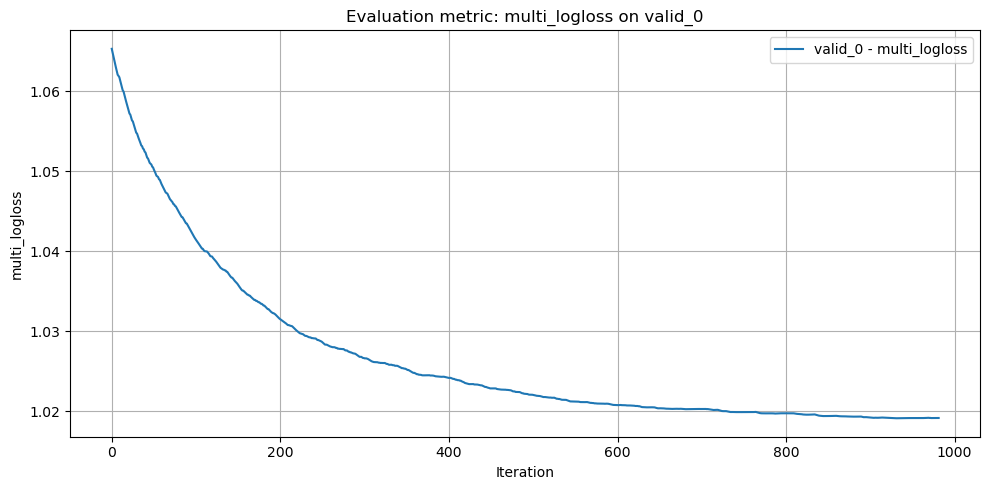

In [150]:
for data_name, metrics in results.items():
    for metric_name, values in metrics.items():
        plt.figure(figsize=(10, 5))
        plt.plot(values, label=f"{data_name} - {metric_name}")
        plt.title(f"Evaluation metric: {metric_name} on {data_name}")
        plt.xlabel("Iteration")
        plt.ylabel(metric_name)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()